In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
url='http://nagyvofely.hu/Budapest/irszam'
res = requests.get(url)
res = BeautifulSoup(res.content,'lxml')

data = res.findAll('fieldset')

In [3]:
postal_code=[d.find('a').text for d in data]
district=[d.find('a')['title'].replace(' ', '').split(',')[1].split('.')[0] for d in data]

In [4]:
df=pd.DataFrame()
df['PostalCode']=postal_code
df['Neighborhood']=district
df.tail(10)

,PostalCode,Neighborhood
151,1214,XXI
152,1215,XXI
153,1221,XXII
154,1222,XXII
155,1223,XXII
156,1224,XXII
157,1225,XXII
158,1237,XXIII
159,1238,XXIII
160,1239,XXIII


In [ ]:
url_temp='https://xn--irnytszmok-t4af6mnd.cybo.com/magyarorsz%C3%A1g/postal_budapest-x.-ker%C3%BClet/'

lat=[]
lon=[]
latlon=pd.DataFrame()

for postal in df['PostalCode'][0:9]:
    url=url_temp.replace('postal', str(postal))

    res = requests.get(url, headers=headers)
    res = BeautifulSoup(res.content,'lxml')
    tables=res.findAll('table')
    if(len(tables)!=0):
        table=tables[0]
        rows=table.findAll('tr')

        for r in rows:
            cells=r.findAll('td')
            if cells[0].text=='Koordináták':
                coords=cells[1].text.split('/')
                lat.append(coords[0].replace('°','').replace(' ', ''))
                lon.append(coords[1].replace('°','').replace(' ',''))
    else:
        print(postal)

In [ ]:
df['Borough.Latitude']=lat
df['Borough.Longitude']=lon
df.head()

In [5]:
url='https://en.m.wikipedia.org/wiki/List_of_districts_in_Budapest'

#res=requests.get(url)
#res=BeautifulSoup(res.content, 'lxml')
#table=res.find('table')
df2=pd.read_html(url, skiprows=1)[0]
df2.head()

,0,1,2,3
0,I.,Várkerület(Castle District),"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...","Buda Castle, Matthias Church, Hungarian Nation..."
1,II.,none,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...","Tomb of Gül Baba, Mechwart Park, Cave of Szeml..."
2,III.,Óbuda-Békásmegyer,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...","Ruins of Aquincum, Aquincum Military Amphithea..."
3,IV.,Újpest(New Pest),"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...","Queen of Heavens Church, Synagogue of Újpest, ..."
4,V.,Belváros-Lipótváros(Inner City-Leopold Town),"Inner City, Lipótváros","Parliament, Hungarian Academy of Sciences, Gre..."


In [6]:
df3=pd.DataFrame() 
df3['Neighborhood']=df2[0].apply(lambda x: x.replace('.','').replace(' kerület',''))
df3['Borough']=df2[2]
df3.drop(df3.index[-1], inplace=True)
df3.head()

,Neighborhood,Borough
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro..."
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ..."
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill..."
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I..."
4,V,"Inner City, Lipótváros"


In [7]:
coords='47.4979° N, 19.0402° E, 47.5393° N, 18.9869° E, 47.5672° N, 19.0369° E, 47.5649° N, 19.0913° E, 47.5002° N, 19.0520° E, 47.5099° N, 19.0626° E, 47.5027° N, 19.0734° E, 47.4894° N, 19.0707° E, 47.4649° N, 19.0916° E, 47.4833° N, 19.1573° E, 47.4593° N, 19.0187° E, 47.4991° N, 18.9905° E, 47.5355° N, 19.0709° E, 47.5225° N, 19.1147° E, 47.5589° N, 19.1193° E, 47.5183° N, 19.1919° E, 47.4803° N, 19.2667° E, 47.4281° N, 19.2098° E, 47.4457° N, 19.1430° E, 47.4333° N, 19.1193° E, 47.4244° N, 19.0661° E, 47.4250° N, 19.0317° E, 47.3940° N, 19.1225° E'
coords=coords.replace('° E', '').replace('° N', '').split(', ')
df3['Neighborhood.Latitude']=coords[::2]
df3['Neighborhood.Longitude']=coords[1::2]
df3

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913
4,V,"Inner City, Lipótváros",47.5002,19.0520
5,VI,Terézváros,47.5099,19.0626
6,VII,Erzsébetváros,47.5027,19.0734
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573


In [8]:
merged = pd.merge(left=df3, right=df, left_on='Neighborhood', right_on='Neighborhood')
merged.tail()

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,PostalCode
156,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1224
157,XXII,"Budatétény, Nagytétény, Budafok",47.4250,19.0317,1225
158,XXIII,Soroksár,47.3940,19.1225,1237
159,XXIII,Soroksár,47.3940,19.1225,1238
160,XXIII,Soroksár,47.3940,19.1225,1239


In [9]:
!pip install folium==0.5.0
#!conda install -c conda-forge folium
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

     |████████████████████████████████| 81kB 6.8MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium


In [10]:
bp_lat=47.48
bp_lon=19.13

line_points=[
    (47.3850,19.0320),
    (47.5850,19.0580)
]

map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>',
        )
    ).add_to(map)

for lat , lon, label in zip(df3['Neighborhood.Latitude'], df3['Neighborhood.Longitude'], df3['Neighborhood']):
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)], 
        radius=5,
        color='red',
        popup=label,
        fill=True,
        fill_color='#500000',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map)

map

In [11]:
CLIENT_ID='YOUR_ID'
CLIENT_SECRET='YOUR_SECRET'
VERSION='20180605'
LIMIT=300
RADIUS=1000

In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
def getNearbyVenues(names, lats, lons):
    list=[]
    for n, la, lo in zip(names, lats, lons):
        url= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, la, lo, RADIUS, LIMIT)
        results= requests.get(url).json()['response']['groups'][0]['items']
        list.append([(
         n, 
         la, 
         lo, 
         v['venue']['name'], 
         v['venue']['location']['lat'], 
         v['venue']['location']['lng'], 
         v['venue']['categories'][0]['name']) for v in results]
        )
    
    nearby=pd.DataFrame([item for vlist in list for item in vlist])
    nearby.columns=[
     'Neighborhood',
     'Neighborhood Latitude', 
     'Neighborhood Longitude',
     'Venue',
     'Venue Latitude',
     'Venue Longitude', 
     'Venue Category'
    ]

    return(nearby)

In [14]:
venues=getNearbyVenues(
  names=df3['Neighborhood'],
  lats=df3['Neighborhood.Latitude'],
  lons=df3['Neighborhood.Longitude']
)
print(venues.shape)

(1169, 7)


In [15]:
onehot=pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")
onehot['Neighborhood']=venues['Neighborhood']
fixed_columns=[onehot.columns[-1]]+list(onehot.columns[:-1])
onehot=onehot[fixed_columns]
grouped=onehot.groupby('Neighborhood').mean().reset_index()
print(grouped.shape)

(23, 216)


In [16]:
def most_common_venues(row, top):
    row_categories=row.iloc[1:]
    row_categories_sorted= row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:top]

In [17]:
import numpy as np

In [18]:
top=10
indicators=['st', 'nd', 'rd']
columns=['Neighborhood']
for ind in np.arange(top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicator[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

sorted=pd.DataFrame(columns=columns)
sorted['Neighborhood']=grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    sorted.iloc[ind, 1:]=most_common_venues(grouped.iloc[ind, :],top)

sorted.head()

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,Hotel,Coffee Shop,Hungarian Restaurant,Plaza,Scenic Lookout,Pub,Bistro,Italian Restaurant,Wine Bar,Historic Site
1,II,Park,Tennis Court,Athletics & Sports,Tram Station,Scenic Lookout,Bus Stop,Track,Playground,Campground,Soccer Field
2,III,Bus Stop,Electronics Store,Train Station,Bus Station,Mountain,Fast Food Restaurant,Clothing Store,Historic Site,Track,Plaza
3,IV,Bakery,Fast Food Restaurant,Café,Grocery Store,Dessert Shop,Park,Bus Stop,Restaurant,Burger Joint,Gastropub
4,IX,Furniture / Home Store,Soccer Field,Tram Station,Gym / Fitness Center,Bus Station,Train Station,Bookstore,Supermarket,Mobile Phone Shop,Bus Stop


In [19]:
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 266kB 7.1MB/s eta 0:00:01


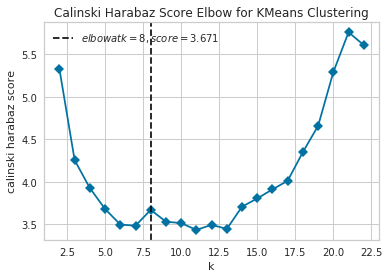

In [21]:
clustering=grouped.drop('Neighborhood', 1)

visualizer = KElbowVisualizer(KMeans(), k=(2,23), metric='calinski_harabasz', timings=False)
visualizer.fit(clustering)
visualizer.show() 

In [22]:
# The code was removed by Watson Studio for sharing.

In [23]:
k=8
kmeans=KMeans(n_clusters=k, random_state=0)
kmeans.fit(clustering)

clustered=sorted
clustered.insert(0,'Cluster Labels', kmeans.labels_)

merged=df3
merged=merged.join(sorted.set_index('Neighborhood'), on='Neighborhood')
merged

,Neighborhood,Borough,Neighborhood.Latitude,Neighborhood.Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,"Buda Castle, Tabán, Gellérthegy, Krisztinaváro...",47.4979,19.0402,1,Hotel,Coffee Shop,Hungarian Restaurant,Plaza,Scenic Lookout,Pub,Bistro,Italian Restaurant,Wine Bar,Historic Site
1,II,"Adyliget, Budakeszierdő, Budaliget, Csatárka, ...",47.5393,18.9869,0,Park,Tennis Court,Athletics & Sports,Tram Station,Scenic Lookout,Bus Stop,Track,Playground,Campground,Soccer Field
2,III,"Óbuda, Aquincum, Aranyhegy, Békásmegyer, Csill...",47.5672,19.0369,7,Bus Stop,Electronics Store,Train Station,Bus Station,Mountain,Fast Food Restaurant,Clothing Store,Historic Site,Track,Plaza
3,IV,"Újpest, Megyer, Káposztásmegyer, Székesdűlő, I...",47.5649,19.0913,6,Bakery,Fast Food Restaurant,Café,Grocery Store,Dessert Shop,Park,Bus Stop,Restaurant,Burger Joint,Gastropub
4,V,"Inner City, Lipótváros",47.5002,19.0520,1,Hotel,Italian Restaurant,Coffee Shop,Plaza,Hungarian Restaurant,Restaurant,Bar,Mediterranean Restaurant,Wine Bar,Ice Cream Shop
5,VI,Terézváros,47.5099,19.0626,1,Italian Restaurant,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Pizza Place,Pub,Bar,Beer Bar,Hotel,Indian Restaurant
6,VII,Erzsébetváros,47.5027,19.0734,1,Coffee Shop,Hotel,Bar,Restaurant,Hungarian Restaurant,Bakery,Beer Bar,Bistro,Burger Joint,Theater
7,VIII,"Józsefváros, Kerepesdűlő, Tisztviselőtelep",47.4894,19.0707,1,Coffee Shop,Italian Restaurant,Hotel,Bar,Burger Joint,Wine Bar,Ice Cream Shop,Electronics Store,Plaza,Beer Bar
8,IX,"Ferencváros, Gubacsidűlő, József Attila-lakótelep",47.4649,19.0916,1,Furniture / Home Store,Soccer Field,Tram Station,Gym / Fitness Center,Bus Station,Train Station,Bookstore,Supermarket,Mobile Phone Shop,Bus Stop
9,X,"Felsőrákos, Gyárdűlő, Keresztúridűlő, Kőbánya-...",47.4833,19.1573,6,Arts & Entertainment,Bus Stop,Tram Station,Pub,Gym,Pharmacy,Park,Fast Food Restaurant,Fruit & Vegetable Store,Furniture / Home Store


In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [25]:
map=folium.Map(location=[bp_lat, bp_lon], zoom_start=11)

folium.PolyLine(line_points, color='blue', weight=5, opacity=1).add_to(map)

folium.map.Marker(
    [47.5850, 19.0200],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Buda</b>'
        )
    ).add_to(map)
folium.map.Marker(
    [47.5850, 19.0600],
    icon=folium.DivIcon(
        icon_size=(15,15),
        icon_anchor=(0,0),
        html='<b style="font-size: 16pt;">Pest</b>'
        )
    ).add_to(map)

x=np.arange(k)
ys=[i+x+(i*x)**2 for i in range(k)]
colors_array=cm.rainbow(np.linspace(0,1,len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

markers_colors=[]

for lat, lon, poi, clus in zip(merged['Neighborhood.Latitude'], merged['Neighborhood.Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label=folium.Popup(str(poi)+' Cluster '+str(clus), parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lon)], 
        radius=5,
        color=rainbow[clus-1], 
        #popup=label,
        fill=True,
        fill_color=rainbow[clus-1], 
        fill_opacity=0.7).add_to(map)
    folium.Circle(
        [float(lat), float(lon)],
        radius=RADIUS,
        color='green',  
        fill=False).add_to(map)
                                        
map

In [26]:
merged.loc[merged['Cluster Labels']==0, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,II,Park,Tennis Court,Athletics & Sports,Tram Station,Scenic Lookout,Bus Stop,Track,Playground,Campground,Soccer Field


In [27]:
merged.loc[merged['Cluster Labels']==1, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,I,Hotel,Coffee Shop,Hungarian Restaurant,Plaza,Scenic Lookout,Pub,Bistro,Italian Restaurant,Wine Bar,Historic Site
4,V,Hotel,Italian Restaurant,Coffee Shop,Plaza,Hungarian Restaurant,Restaurant,Bar,Mediterranean Restaurant,Wine Bar,Ice Cream Shop
5,VI,Italian Restaurant,Coffee Shop,Vietnamese Restaurant,Ice Cream Shop,Pizza Place,Pub,Bar,Beer Bar,Hotel,Indian Restaurant
6,VII,Coffee Shop,Hotel,Bar,Restaurant,Hungarian Restaurant,Bakery,Beer Bar,Bistro,Burger Joint,Theater
7,VIII,Coffee Shop,Italian Restaurant,Hotel,Bar,Burger Joint,Wine Bar,Ice Cream Shop,Electronics Store,Plaza,Beer Bar
8,IX,Furniture / Home Store,Soccer Field,Tram Station,Gym / Fitness Center,Bus Station,Train Station,Bookstore,Supermarket,Mobile Phone Shop,Bus Stop
12,XIII,Gym / Fitness Center,Coffee Shop,Pub,Park,Chinese Restaurant,Supermarket,Indian Restaurant,Electronics Store,Diner,Gym


In [28]:
merged.loc[merged['Cluster Labels']==2, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,XV,Bus Stop,Pizza Place,Grocery Store,Bakery,Pet Store,Pub,Restaurant,Clothing Store,Shoe Store,Soccer Stadium
15,XVI,Bus Stop,Grocery Store,Pharmacy,Gym / Fitness Center,Pizza Place,Smoke Shop,Sporting Goods Shop,Supermarket,Eastern European Restaurant,Paintball Field
16,XVII,Bus Stop,Grocery Store,Pharmacy,Train Station,Burger Joint,Farmers Market,Café,Carpet Store,Chinese Restaurant,Optical Shop
17,XVIII,Bus Stop,Grocery Store,Cosmetics Shop,Park,Bakery,Gym / Fitness Center,Eastern European Restaurant,Dessert Shop,Playground,Plaza
18,XIX,Bus Stop,Tram Station,Grocery Store,Liquor Store,Park,Yoga Studio,Dive Shop,Salon / Barbershop,Hungarian Restaurant,Plaza
21,XXII,Bus Stop,Bakery,Playground,Plaza,Tram Station,Park,Bus Station,Food & Drink Shop,Stadium,Scenic Lookout


In [29]:
merged.loc[merged['Cluster Labels']==3, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,XX,Bus Stop,Tram Station,Grocery Store,Bakery,Food & Drink Shop,Furniture / Home Store,Steakhouse,Shop & Service,Bed & Breakfast,Plaza


In [30]:
merged.loc[merged['Cluster Labels']==4, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,XXIII,Grocery Store,Bakery,Dessert Shop,Light Rail Station,Soccer Field,Flower Shop,Park,Gun Range,Train Station,Bus Stop


In [31]:
merged.loc[merged['Cluster Labels']==5, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,XI,Bus Stop,Bakery,Platform,Bus Station,Grocery Store,Dessert Shop,Hungarian Restaurant,Pub,Dog Run,Food & Drink Shop
11,XII,Bus Stop,Platform,Scenic Lookout,Hungarian Restaurant,Grocery Store,Playground,Pizza Place,Forest,Park,Restaurant


In [32]:
merged.loc[merged['Cluster Labels']==6, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,IV,Bakery,Fast Food Restaurant,Café,Grocery Store,Dessert Shop,Park,Bus Stop,Restaurant,Burger Joint,Gastropub
9,X,Arts & Entertainment,Bus Stop,Tram Station,Pub,Gym,Pharmacy,Park,Fast Food Restaurant,Fruit & Vegetable Store,Furniture / Home Store
13,XIV,Bus Stop,Bakery,Chinese Restaurant,Ice Cream Shop,Pub,Plaza,Dessert Shop,Gym / Fitness Center,Italian Restaurant,Grocery Store
20,XXI,Bus Stop,Gym,Restaurant,Beer Garden,Bus Station,Soccer Field,Fast Food Restaurant,Grocery Store,Electronics Store,Farmers Market


In [33]:
merged.loc[merged['Cluster Labels']==7, merged.columns[[0]+list(range(k-3, merged.shape[1]))]]

,Neighborhood,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,III,Bus Stop,Electronics Store,Train Station,Bus Station,Mountain,Fast Food Restaurant,Clothing Store,Historic Site,Track,Plaza
